In [ ]:
!pip install --quiet wandb
!pip install --quiet transformers
!pip install --quiet datasets
!pip install --quiet emoji
!pip install --quiet kaggle
!pip install --quiet torchinfo
!pip install --quiet imbalanced-learn
!pip install --quiet gdown

! wandb login 557d23623792769ba75ac9339688531528b81909


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00

In [ ]:
!pip install --quiet clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
import transformers
from torch.utils import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# data processing
import re, string
import emoji
import nltk

# dataset
from sklearn.model_selection import train_test_split
import datasets
from datasets import Dataset , Sequence , Value , Features , ClassLabel , DatasetDict

# preprocessing
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

import re, string

from tqdm import tqdm
from collections import defaultdict

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# list of pretrained models: https://huggingface.co/transformers/v3.3.1/pretrained_models.html
models = ["distilbert-base-uncased", "bert-base-uncased", "bert-base-cased"]
modelName = models[2]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Corona_NLP_train.csv",encoding='latin')
print(df_train.shape)
print(df_train.columns)

(41157, 6)
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [ ]:
df_train = df_train[["OriginalTweet", "Sentiment"]]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [ ]:
df_train.drop_duplicates(subset='OriginalTweet',inplace=True)
df_train = df_train.rename({'OriginalTweet': 'Reviews'}, axis='columns')
df_train['Sentiment']=df_train['Sentiment'].replace({'Neutral':2, 'Positive':3,'Extremely Positive':4, 'Extremely Negative':0,'Negative':1})
df_train['Sentiment']=df_train['Sentiment'].astype(int)

df_train = df_train.reset_index(drop=True)
df_train.head()

,Reviews,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the #COV...",0


In [ ]:
# df.info()
df_train.isnull().sum()

Reviews      0
Sentiment    0
dtype: int64

In [ ]:
df_train["Sentiment"].value_counts()

3    11422
1     9917
2     7713
4     6624
0     5481
Name: Sentiment, dtype: int64

In [ ]:
# word tokenizer
df_train['Reviews_len_by_words'] = df_train['Reviews'].apply(lambda t: len(t.split()))
min_len_word, max_len_word = df_train['Reviews_len_by_words'].min(), df_train['Reviews_len_by_words'].max()
print(min_len_word, max_len_word)

1 64


<Axes: xlabel='Reviews_len_by_words', ylabel='Count'>

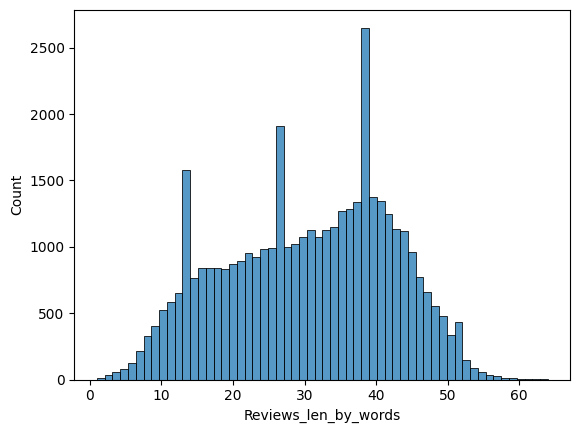

In [ ]:
sns.histplot(df_train['Reviews_len_by_words'])

# padding is based on the token lengths not the word lengths > MAX_LEN=64

In [ ]:
df_train.describe()

,Sentiment,Reviews_len_by_words
count,41157.000000,41157.000000
mean,2.092111,30.500304
std,1.298655,11.591172
min,0.000000,1.000000
25%,1.000000,21.000000
50%,2.000000,32.000000
75%,3.000000,40.000000
max,4.000000,64.000000


[Text(0, 0, 'Extremely Negative'),
 Text(1, 0, 'Negative'),
 Text(2, 0, 'Neutral'),
 Text(3, 0, 'Positive'),
 Text(4, 0, 'Extremely Positive')]

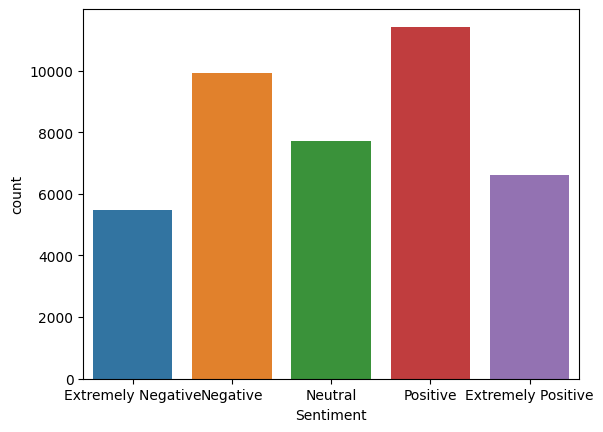

In [ ]:
class_names = ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']
ax = sns.countplot(x='Sentiment', data=df_train)
ax.set_xticklabels(class_names)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Corona_NLP_test.csv",encoding='latin')
df_test = df_test.drop(labels=['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)
df_test.drop_duplicates(subset='OriginalTweet',inplace=True)

df_test = df_test.rename({'OriginalTweet': 'Reviews'}, axis="columns")

df_test['Sentiment']=df_test['Sentiment'].replace({'Neutral':2, 'Positive':3,'Extremely Positive':4, 'Extremely Negative':0,'Negative':1})
df_test['Sentiment']=df_test['Sentiment'].astype(int)
df_test = df_test.reset_index(drop=True)

df_test.head()

,Reviews,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,0
1,When I couldn't find hand sanitizer at Fred Me...,3
2,Find out how you can protect yourself and love...,4
3,#Panic buying hits #NewYork City as anxious sh...,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,2


In [ ]:
# suffle series
# df_train = df_train.sample(frac=1, random_state=RANDOM_SEED)

print(df_train.shape , df_test.shape)
df_train, df_val = train_test_split(df_train, test_size=0.09, random_state=RANDOM_SEED, stratify=df_train['Sentiment'])
print(df_train.shape , df_val.shape, df_test.shape)

(41157, 3) (3798, 2)
(37452, 3) (3705, 3) (3798, 2)


In [ ]:
def createDataset(df, textCol, labelCol):
  dataset_dict = {
    'text' : df[textCol],
    'labels' : df[labelCol],
  }
  sent_tags = ClassLabel(num_classes=5 , names=['Extremely Negative', 'Negative','Neutral','Positive', 'Extremely Positive'])

  return Dataset.from_dict(
    mapping = dataset_dict,
    features = Features({'text' : Value(dtype='string') , 'labels' :sent_tags})
  )

In [ ]:
dataset_train = createDataset(df_train,"Reviews","Sentiment")
dataset_val = createDataset(df_val,"Reviews","Sentiment")
dataset_test = createDataset(df_test,"Reviews","Sentiment")

dataset_sentAnalysis = DatasetDict()
dataset_sentAnalysis["train"] = dataset_train
dataset_sentAnalysis["val"] = dataset_val
dataset_sentAnalysis["test"] = dataset_test

dataset_sentAnalysis

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 37452
    })
    val: Dataset({
        features: ['text', 'labels'],
        num_rows: 3705
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 3798
    })
})

In [ ]:
def convert_to_lower(text):
    return text.lower()

def remove_emojis(text):
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r"<.*?>","",text)

    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        # u"\u200c"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    return wierd_pattern.sub(r'', text)

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

def preprocessText(text):
  return remove_extra_white_spaces(remove_stopwords(remove_punctuation(remove_numbers(remove_emojis(convert_to_lower(text))))))

def preprocessBatch(batch):
  new_list = []
  for i in batch["text"]:
    new_list.append(remove_extra_white_spaces(remove_stopwords(remove_punctuation(remove_numbers(remove_emojis(convert_to_lower(i)))))))
  batch["text"] = new_list
  return batch

In [ ]:
dataset_sentAnalysis_preprocessed = dataset_sentAnalysis.map(preprocessBatch, batched=True, batch_size=32)

Parameter 'function'=<function preprocessBatch at 0x7fd7146011b0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/37452 [00:00<?, ? examples/s]

Map:   0%|          | 0/3705 [00:00<?, ? examples/s]

Map:   0%|          | 0/3798 [00:00<?, ? examples/s]

In [ ]:
dataset_sentAnalysis["train"][10]

{'text': "NYC Administrative Code 20-701(b) makes it illegal to increase prices by 10 percent or more during a 60 day period. If you've witnessed #PriceGouging on items like #HandSanitizer during the #coronavirus, you can report it the Attorney General. Learn how: https://t.co/Qjl8iWnkIk https://t.co/1XoKevtQ5U",
 'labels': 3}

In [ ]:
dataset_sentAnalysis_preprocessed["train"][10]

{'text': 'nyc administrative code makes illegal increase prices percent day period youve witnessed pricegouging items like handsanitizer coronavirus report attorney general learn',
 'labels': 3}

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(modelName)

In [ ]:
max_len = 128
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True, max_length=max_len)

In [ ]:
sample_text = "What is  going on @resturant.:( It makes   Me Feel Upset.😞"
tokens = tokenizer.tokenize(sample_text)
print(len(tokens), tokens)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(len(token_ids), token_ids)

token_dictionary = tokenizer(sample_text)
print(token_dictionary)
print(len(token_dictionary.input_ids)) # automatically added cls, sep

tokens = tokenizer.convert_ids_to_tokens(token_dictionary['input_ids'])
print(tokens)

token_encode = tokenizer.encode(sample_text) #convert to tokens ids but with cls+sep
print(token_encode)

19 ['What', 'is', 'going', 'on', '@', 'rest', '##ura', '##nt', '.', ':', '(', 'It', 'makes', 'Me', 'Feel', 'Up', '##set', '.', '[UNK]']
19 [1327, 1110, 1280, 1113, 137, 1832, 4084, 2227, 119, 131, 113, 1135, 2228, 2508, 14425, 3725, 9388, 119, 100]
{'input_ids': [101, 1327, 1110, 1280, 1113, 137, 1832, 4084, 2227, 119, 131, 113, 1135, 2228, 2508, 14425, 3725, 9388, 119, 100, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
21
['[CLS]', 'What', 'is', 'going', 'on', '@', 'rest', '##ura', '##nt', '.', ':', '(', 'It', 'makes', 'Me', 'Feel', 'Up', '##set', '.', '[UNK]', '[SEP]']
[101, 1327, 1110, 1280, 1113, 137, 1832, 4084, 2227, 119, 131, 113, 1135, 2228, 2508, 14425, 3725, 9388, 119, 100, 102]


In [ ]:
# we use special tokens to separate the sentences. How bert works
print(tokenizer)
print(tokenizer.sep_token, tokenizer.sep_token_id)
print(tokenizer.cls_token, tokenizer.cls_token_id)
print(tokenizer.pad_token, tokenizer.pad_token_id)
print(tokenizer.unk_token, tokenizer.unk_token_id)

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)
[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [ ]:
# the inputs same as distilbert_tokenizer()
encoding = tokenizer.encode_plus(
    sample_text,
    max_length=max_len,
    add_special_tokens=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_token_type_ids=False,
    return_tensors="pt"
)
encoding

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': tensor([[  101,  1327,  1110,  1280,  1113,   137,  1832,  4084,  2227,   119,
           131,   113,  1135,  2228,  2508, 14425,  3725,  9388,   119,   100,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
dataset_sentAnalysis_encoded = dataset_sentAnalysis_preprocessed.map(tokenize, batched=True, batch_size=32)

Map:   0%|          | 0/37452 [00:00<?, ? examples/s]

Map:   0%|          | 0/3705 [00:00<?, ? examples/s]

Map:   0%|          | 0/3798 [00:00<?, ? examples/s]

In [ ]:
dataset_sentAnalysis_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 37452
    })
    val: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3705
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3798
    })
})

In [ ]:
len(dataset_sentAnalysis_encoded["train"][10]["input_ids"])

51

In [ ]:
dataset_sentAnalysis_encoded["train"][0]["input_ids"]

[101,
 18006,
 248,
 2599,
 3309,
 3848,
 1665,
 5986,
 28198,
 2653,
 181,
 7956,
 1183,
 15405,
 26825,
 7352,
 5986,
 26825,
 2041,
 1156,
 2616,
 182,
 1186,
 189,
 1183,
 1884,
 18312,
 3893,
 2821,
 1465,
 16632,
 4724,
 1884,
 15789,
 27608,
 181,
 7956,
 6834,
 13799,
 2646,
 5710,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
from torch.utils import data
class CovidReviewDataset(data.Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len=512, transform=None):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.transform = transform

  # how large the datset is
  def __len__(self):
    return len(self.reviews)

  def __getitem__(self,itemInd):
    reviews =  str(self.reviews[itemInd])

    # implement in transform too
    reviews = preprocessText(reviews)

    if self.transform:
        reviews = self.transform(self.reviews)

    encoding = tokenizer.encode_plus(
        reviews,
        max_length=self.max_len,
        add_special_tokens=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors="pt"
    )

    # encoding["input_ids"] > 1*150 >> .flatten() > 150, > in bach size makes problem

    return {
        'review_text': reviews,
        'input_ids': encoding["input_ids"].flatten(),
        'attention_mask': encoding["attention_mask"].flatten(),
        'targets': torch.tensor(self.targets[itemInd], dtype=torch.long)
    }

def create_dataloader(df, tokenizer, max_len, batch_size):
    ds = CovidReviewDataset(
        reviews = df["Reviews"].to_numpy(),
        targets = df["Sentiment"].to_numpy(),
        tokenizer = tokenizer,
        max_len = max_len
    )

    return data.DataLoader (
        ds,
        batch_size = batch_size,
        num_workers = 0
    )

In [ ]:
batch_size = 8

train_data_loader = create_dataloader(df_train, tokenizer, max_len, batch_size)
val_data_loader = create_dataloader(df_val, tokenizer, max_len, batch_size)
test_data_loader = create_dataloader(df_test, tokenizer, max_len, batch_size)

In [ ]:
it = iter(train_data_loader)
data_batch = next(it)
data_batch.keys()

print(data_batch["input_ids"].shape, data_batch["attention_mask"].shape, data_batch["targets"].shape)
data_batch["input_ids"][0]

torch.Size([8, 128]) torch.Size([8, 128]) torch.Size([8])


tensor([  101, 18006,   248,  2599,  3309,  3848,  1665,  5986, 28198,  2653,
          181,  7956,  1183, 15405, 26825,  7352,  5986, 26825,  2041,  1156,
         2616,   182,  1186,   189,  1183,  1884, 18312,  3893,  2821,  1465,
        16632,  4724,  1884, 15789, 27608,   181,  7956,  6834, 13799,  2646,
         5710,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
from transformers import BertConfig
from transformers.models.bert.modeling_bert import BertModel, BertPreTrainedModel
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn

class BertForClassification(BertPreTrainedModel):

    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        # Load model body > return all og the HS
        self.bert = BertModel(config)
        # Set up token classification head
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Initialize weights and apply final processing
        self.post_init()


    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None,
                labels=None, **kwargs):
        # Use model body to get encoder representations
        outputs = self.bert(input_ids, attention_mask=attention_mask,
                               token_type_ids=token_type_ids, **kwargs)

        # Apply classifier to encoder representation > [cls]
        sequence_output = self.dropout(outputs[1])
        logits = self.classifier(sequence_output)

        # Calculate losses
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        # Return model output object
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )

In [ ]:
from transformers import AutoConfig

id2label = {
    0: 'Extremely Negative',
    1: 'Negative',
    2: 'Neutral',
    3: 'Positive',
    4: 'Extremely Positive'
}

label2id = { v:k for (k,v) in id2label.items()}

bert_config = AutoConfig.from_pretrained(modelName,
                                         num_labels=5,
                                         id2label=id2label, label2id=label2id)

In [ ]:
bert_model = (BertForClassification
              .from_pretrained(modelName, config=bert_config)
              .to(device))

Some weights of BertForClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from torch.optim import AdamW
from transformers import get_scheduler

lr=2e-5
optimizer = AdamW(bert_model.parameters(), lr=lr)

num_epochs = 5

logging_steps = len(dataset_sentAnalysis_encoded["train"]) // batch_size
num_training_steps = num_epochs * logging_steps
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [ ]:
loss_fct = nn.CrossEntropyLoss().to(device)

In [ ]:
import wandb
wandb.init(project="bert-eng-model")
wandb.config = {
    "learning_rate": lr, "epochs": num_epochs, "batch_size": batch_size
}

wandb: Currently logged in as: zahraarabi1998. Use `wandb login --relogin` to force relogin


In [ ]:
from tqdm.notebook import tqdm

def eval_op(model, data_loader, loss_fn, n_examples):
    model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
      for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, targets)
        correct_predictions += torch.sum(preds.indices == targets)
        losses.append(loss.item())
    wandb.log({
        "loss-eval": np.mean(losses),
        "accuracy-eval": correct_predictions.double(),
        "learning-rate":optimizer.param_groups[0]['lr']
    })
    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  n_examples,
  scheduler=None
):

  # put the model in training mode > dropout is considered for exp
  model.train()
  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device) #bs*classes
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    preds = torch.max(outputs.logits, dim=1)

    # the loss has grad function
    loss = loss_fn(outputs.logits, targets)
    correct_predictions += torch.sum(preds.indices == targets)
    losses.append(loss.item())
    loss.backward()

    # avoid exploding gradient - gradient clipping
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    optimizer.step()
    # scheduler.step()
    optimizer.zero_grad()

  wandb.log({
      "loss-train": np.mean(losses),
      "accuracy-train": correct_predictions.double(),
      "learning-rate": optimizer.param_groups[0]['lr']
  })

  # return accuracy and loss
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in tqdm(range(num_epochs)):
  print(f'Epoch {epoch + 1}/{num_epochs}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    bert_model,
    train_data_loader,
    loss_fct,
    optimizer,
    len(df_train),
    scheduler=lr_scheduler
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_op(
    bert_model,
    val_data_loader,
    loss_fct,
    len(df_val)
  )
  print(f'Val loss {val_loss} accuracy {val_acc}')
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save({
            'epoch': epoch,
            'model_state_dict': bert_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss
            }, f'./bert-eng.bin')
    best_accuracy = val_acc

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Train loss 0.8595683131826861 accuracy 0.6709655025098793
Val loss 0.7122185042063738 accuracy 0.7417004048582996
Epoch 2/5
----------
Train loss 0.6071586948901014 accuracy 0.793095161807113
Val loss 0.7312052444322035 accuracy 0.7568151147098515
Epoch 3/5
----------
Train loss 0.5026819783674464 accuracy 0.8470308661753712
Val loss 0.8227368140420556 accuracy 0.7597840755735492
Epoch 4/5
----------
Train loss 0.4363794311922738 accuracy 0.8795791947025525
Val loss 0.982991682446325 accuracy 0.7651821862348178
Epoch 5/5
----------
Train loss 0.38689641446977757 accuracy 0.9009131688561358
Val loss 1.156153346241777 accuracy 0.732523616734143
CPU times: user 1h 20min 44s, sys: 25.6 s, total: 1h 21min 10s
Wall time: 1h 22min 42s


In [ ]:
# the best model checkpoint saves in path > /content/drive/MyDrive/bert-eng-3.bin
test_acc, test_loss = eval_op(bert_model, test_data_loader, loss_fct, len(df_test))
test_acc, test_loss

(tensor(0.7022, device='cuda:0', dtype=torch.float64), 1.244304538514269)

In [ ]:
def get_reviews(model, data_loader):

  model = model.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _,preds = torch.max(outputs.logits, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs.logits)
      real_values.extend(targets)

  # convert the list of tensors to a single tensor
  # review_texts is a list of strings not tensors
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()

  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_probs, y_test = get_reviews(bert_model, test_data_loader)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Extremely Negative', 'Negative','Neutral', 'Positive', 'Extremely Positive']
print(classification_report(y_test, y_pred, target_names=class_names))

                    precision    recall  f1-score   support

Extremely Negative       0.72      0.75      0.74       592
          Negative       0.70      0.63      0.67      1041
           Neutral       0.84      0.77      0.81       619
          Positive       0.68      0.57      0.62       947
Extremely Positive       0.61      0.90      0.73       599

          accuracy                           0.70      3798
         macro avg       0.71      0.73      0.71      3798
      weighted avg       0.71      0.70      0.70      3798



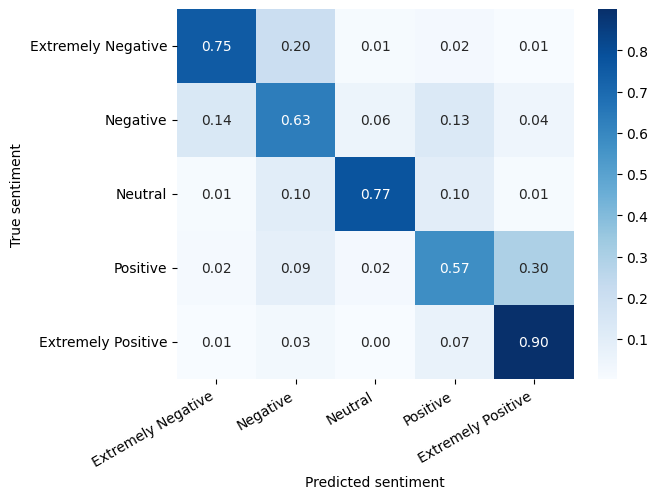

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment')

cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
sample_text = "I buy a new house. This is great for me." #Neutral
sample_text = preprocessText(sample_text)
encoding = tokenizer.encode_plus(
    sample_text,
    max_length=max_len,
    add_special_tokens=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_token_type_ids=False,
    return_tensors="pt"
)

input_ids = encoding["input_ids"].to(device)
attention_mask = encoding["attention_mask"].to(device)

output = bert_model(input_ids, attention_mask)
_,preds = torch.max(output.logits, dim=1)
print(preds)
print(class_names[preds])

pd.set_option('display.max_colwidth', -1)
pd.DataFrame({
    "Text": sample_text,
    "Sentiment": class_names[preds]
},index=[0]).T

tensor([4], device='cuda:0')
Extremely Positive


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-51-a3c547468c9a>:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,0
Text,buy new house great
Sentiment,Extremely Positive
